In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from math import sqrt,cos,acos,pi,exp,sin,atan2,log
from numpy import arange,mean,asarray,isnan,isinf
import pickle as pkl
from scipy import stats

import csv
import sys
import pandas as pd
import os

from SelectionHelper import MakeAvgBDTcut
from DavioPlotter import *
    
fset = 12 #11 = midBDT, 12 = all data
cutMode = 0
cutmodedir = 'SignalRegion'
lowEpatch = False

if fset==12:
    DAT_POT1 = 1.631e+20
    DAT_POT2 = 2.750e+20
    DAT_POT3 = 2.291e+20
elif fset==11:
    DAT_POT1 = 1.69E+20
    DAT_POT2 = 2.73E+20
    DAT_POT3 = 2.44E+20
DATA_POT_TOT = DAT_POT1 + DAT_POT2 + DAT_POT3


def poisson_errors(k, CL = 0.6827):
    
    # 1 Sig = 0.6827
    # 2 Sig = 0.9545
    # 3 Sig = 0.9973
    
    a = 1.0 - CL
    low, high = (stats.chi2.ppf(a/2, 2*k) / 2, stats.chi2.ppf(1-a/2, 2*k + 2) / 2)
    low = np.where(k==0,0,low)
    return k - low, high - k


Welcome to JupyROOT 6.16/00


In [2]:
tag='3March2021_vA_fullLowE_withPi0Sample_newShowerCalib'

filetaglist = {1:['data','ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0'],
               2:['data','ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE'],
               3:['data','ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0']}

df = {1:{},2:{},3:{}}

psavedir = 'Parquets/'+tag+'/'

for r in [1,2,3]:
    print('\n\n','#'*20,'RUN',r,'#'*20,'\n')

    for filetag in filetaglist[r]:
        if not lowEpatch and 'lowE' in filetag: continue
        print('Sample:',filetag)
        if filetag=='data':
            pstring = 'SelectionMode%i_%s_fset%i_run%i.parquet.gzip'%(cutMode,filetag,fset,r)
        else:
            pstring = 'SelectionMode%i_%s_fset12_run%i.parquet.gzip'%(cutMode,filetag,r)
        try:
            df[r][filetag] = pd.read_parquet(psavedir+pstring)
            #print(len(df[r][filetag]))
        except:
            print('No Events')
            pass
        
df[2]['ext'] = df[3]['ext'].copy()
if fset==12:
    df1d = (df[1]['data'].copy()).query('run<8000')
    df2d = (df[1]['data'].copy()).query('run>8000 and run<13697')
    df3d = (df[1]['data'].copy()).query('run>13696')
    df[1]['data'] = df1d
    df[2]['data'] = df2d
    df[3]['data'] = df3d



 #################### RUN 1 #################### 

Sample: data
Sample: ext
Sample: overlay
Sample: intrinsics
Sample: ncpi0
Sample: ccpi0


 #################### RUN 2 #################### 

Sample: data
No Events
Sample: ext
No Events
Sample: overlay
Sample: intrinsics


 #################### RUN 3 #################### 

Sample: data
No Events
Sample: ext
Sample: overlay
Sample: intrinsics
Sample: ncpi0
Sample: ccpi0


In [3]:
    

varb_names = ['Enu_1e1p','Eta','PT_1e1p','AlphaT_1e1p',
              'SphB_1e1p','PzEnu_1e1p','ChargeNearTrunk',
              'Q0_1e1p','Q3_1e1p','Thetas','Phis','PTRat_1e1p',
              'Proton_ThetaReco','Proton_PhiReco',
              'MinShrFrac','MaxShrFrac',
              'BjXB_1e1p','BjYB_1e1p','Proton_Edep',
              'Electron_Edep',
              'Lepton_ThetaReco','Lepton_PhiReco',
              'OpenAng','Xreco','Yreco','Zreco',
              'sigprob','MPIDY_muon',
              'MPIDY_proton','MPIDY_eminus','shower_fraction',
              'Shower_Consistency',
              'EnuQE_lepton','EnuQE_proton',
              'Proton_TrackLength','Lepton_TrackLength']

sys_names = ['nu_energy_reco','eta_reco','pT_reco','alphaT_reco',
              'sphB_reco','pzEnu_reco','charge_near_trunk_reco',
              'Q0_reco','Q3_reco','sum_thetas_reco','sum_phis_reco','pT_ratio_reco',
              'proton_theta_reco','proton_phi_reco',
              'min_shr_frac_reco','max_shr_frac_reco',
              'BjxB_reco','BjyB_reco','proton_KE_reco',
              'lepton_KE_reco',
              'lepton_theta_reco','lepton_phi_reco',
              'openang_reco','x_reco','y_reco','z_reco',
              'dllee_bdt_score_avg','mpid_muon_score',
              'mpid_proton_score','mpid_electron_score','shr_charge_ratio_reco',
              'shr_consistency_reco',
              'nu_energy_QE_lepton_reco','nu_energy_QE_proton_reco',
              'proton_length_reco','lepton_length_reco']

var_labels = [r'$E_\nu$ [MeV]',r'$\eta$',r'Event $p_T$ [MeV/c]',r'$\alpha_T$',
              'QE Consistency',r'$p_z - E_\nu$ [MeV]','Charge Near Trunk',
              r'$Q_0$ [MeV/c]',r'$Q_3$ [MeV/c]',r'$\theta_e + \theta_p$ [rad]',r'$|\phi_e - \phi_p|$ [rad]',r'Event $p_T/p$',
              r'$\theta_p$ [rad]',r'$\phi_p$ [rad]',
              'Minimum Shower Fraction','Maximum Shower Fraction',
              'Bjorken X (Nucleon Rest Frame)','Bjorken Y (Nucleon Rest Frame)',r'$E_p$ [MeV]',
              r'$E_e$ [MeV]',
              r'$\theta_e$ [rad]',r'$\phi_e$ [rad]',
              'Opening Angle [rad]',r'$X_{reco}$ [cm]',r'$Y_{reco}$ [cm]','$Z_{reco}$ [cm]',
              '1e1p BDT Score','Muon MPID Score (Y plane)',
              'Proton MPID Score (Y plane)','Electron MPID Score (Y plane)','Shower Fraction',
              'Shower Energy Consistency',
              r'$E_\nu^{QE-\ell}$ [MeV]',r'$E_\nu^{QE-p}$ [MeV]',
              'Proton Track Length [cm]','Lepton Track Length [cm]']

ranges = [ (0,1200),(0,0.6),(0,800),(0,np.pi),(0,5000),(-800,300),
           (0,800),(100,700),(0,1400),(0,2*np.pi),(0,2*np.pi),
           (0,1),(0,np.pi),(-np.pi,np.pi),(-1,1),(-1,1),(0,3),
           (0,1),(50,500),(35,1200),(0,np.pi),
           (-np.pi,np.pi),(0,np.pi),(0,256),(-117,117),(0,1036),
           (0.95,1.0),(0,1),(0,1),(0,1),(0,3),(0,5),
           (0,1200),(0,1200),(0,100),(0,200) ]

varlabel_dict = {name:label for name,label in zip(varb_names,var_labels)}
range_dict = {name:rnge for name,rnge in zip(varb_names,ranges)}
sysnames_dict = {name:sname for name,sname in zip(varb_names,sys_names)}

if fset==11: range_dict['sigprob'] = (0.7,0.95)
    

In [4]:
# HELPER FUNCTIONS
detsystag = '2August2021'
fsiFix = False

def getSysErrors(nbins,varName,sigonly):
    sigcut = 0.95
    if sigonly: det_sys_m = np.loadtxt('CovMatrices/DetVar/'+tag+'/'+detsystag+'/covMatrix/avgscore/BDTcut'+str(sigcut)+'/nsbmode5/detsys_'+varName+'_run13_cutMode'+str(cutMode)+'_cov_smooth.csv',delimiter=',')
    else: det_sys_m = np.loadtxt('CovMatrices/DetVar/'+tag+'/'+detsystag+'/covMatrix/avgscore/BDTcut'+str(sigcut)+'/detsys_'+varName+'_run13_cutMode'+str(cutMode)+'_cov_smooth.csv',delimiter=',')
    if sigonly: 
        if fsiFix: rwt_sys_m = np.loadtxt('CovMatrices/RwghtSys/SigOnly/frac_covar_rewgt_FinalSelection_v55__'+sysnames_dict[varName]+'.txt')
        else: rwt_sys_m = np.loadtxt('CovMatrices/RwghtSys/SigOnly/frac_covar_rewgt_FinalSelection_v48__'+sysnames_dict[varName]+'.txt')
    else:
        if fsiFix: rwt_sys_m = np.loadtxt('CovMatrices/RwghtSys/frac_covar_rewgt_FinalSelection_v55__'+sysnames_dict[varName]+'.txt')
        else: rwt_sys_m = np.loadtxt('CovMatrices/RwghtSys/frac_covar_rewgt_FinalSelection_v48__'+sysnames_dict[varName]+'.txt')
    if fset==11:
            rwt_sys_m = np.loadtxt('CovMatrices/RwghtSys/frac_covar_rewgt_samp3__'+varName+'.txt')
#     if varName=='sigprob': varName='sigprobavg'
#     rwt_sys_m = np.loadtxt('CovMatrices/RwghtSys/frac_covar_rewgt_samp1__'+varName+'.txt')
#     det_sys_m = np.loadtxt('CovMatrices/DetVar/'+tag+'/14July2021/covMatrix/avgscore/BDTcut'+str(sigcut)+'/nsbmode1/detsys_'+varName+'_run13_cutMode'+str(cutMode)+'_cov_smooth.csv',delimiter=',')
#     det_sys_tmp = np.zeros((12,12))
#     det_sys_tmp[5:,5:] = det_sys_m
#     det_sys_m = det_sys_tmp
#     #rwt_sys_m = np.loadtxt('CovMatrices/RwghtSys/v48_Apr08/frac_covar_rewgt_FinalSelection__'+varName+'.txt')
    rwt_sys_m = np.where(np.isnan(rwt_sys_m),0,rwt_sys_m)
    det_sys_m = np.where(np.isnan(det_sys_m),0,det_sys_m)
    return rwt_sys_m,det_sys_m

def getDetSysTot(det_sys_nue,nue,numu):
    det_sys_numu = np.diag(0.04*np.ones(det_sys_nue.shape[0]))
    #det_sys_numu = 0.04*np.ones(det_sys_nue.shape)
    tot = nue+numu
    return (det_sys_nue * np.outer(nue,nue) + det_sys_numu * np.outer(numu,numu))/np.outer(tot,tot)

    
def SaveTextFile(idf,run,filetag,sigcut,tsavedir):
    idf.query('sigprob > @sigcut',inplace=True)
    savestr = 'eventlist_%s_run%i.txt'%(filetag,run)
    idf.to_csv(tsavedir+savestr,index=None,sep=' ')
    
def cov_cnp(M,mu):
    cov=0
    if mu > 0:
        if M != 0:
            cov = (3. / (2. / mu + 1. / M))
        else:
            cov = mu/2.
    return cov
    
    

[Errno 17] File exists: 'TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/FinalSelection/avgscore/BoxOpening/'


/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nwkamp/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in divide
/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:458: RuntimeWarning: invalid value encountered in divide
/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:509: RuntimeWarning: invalid value encountered in double_scalars


4.9471026500027996e-05


<Figure size 432x288 with 0 Axes>

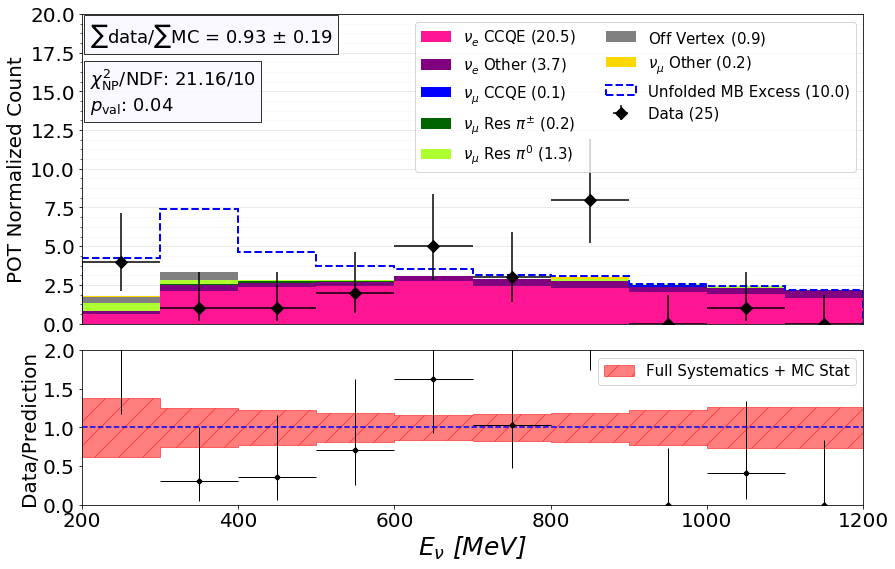

('Normalization Uncertainty:', 0.14544218844308696)
('yerr_mc_total', array([0.        , 0.        , 0.68185659, 0.84701628, 0.65258269,
       0.53711127, 0.49129857, 0.50188521, 0.57676715, 0.58144056,
       0.65617737, 0.59383824]))
(2.1161953096457586, 0.019992136717747133)
(0, 0.0, 0.0)
(1, 0.0, 0.0)
(2, 1.779928609259309, 0.5091312354652276)
(3, 3.2994981952049915, 0.733407822495444)
(4, 2.841542028003766, 0.6260829724502789)
(5, 2.840540594530097, 0.5202181479165064)
(6, 3.0671997816715804, 0.4776720183170682)
(7, 2.9044855780173773, 0.48616704604508465)
(8, 3.00015720544665, 0.5341588266261996)
(9, 2.527623990355192, 0.5554487536982368)
(10, 2.455722156797749, 0.6312375781695846)
(11, 2.1981018812338156, 0.5825945896145812)


DavioPlotter.py:461: RuntimeWarning: invalid value encountered in true_divide
  ax1.errorbar(bincenters,np.true_divide(vals_data,vals_mc),yerr=(er_rat_dotslo,er_rat_dotshi),fmt='o',color='black',capsize=0,markersize=8,elinewidth=2)


<Figure size 432x288 with 0 Axes>

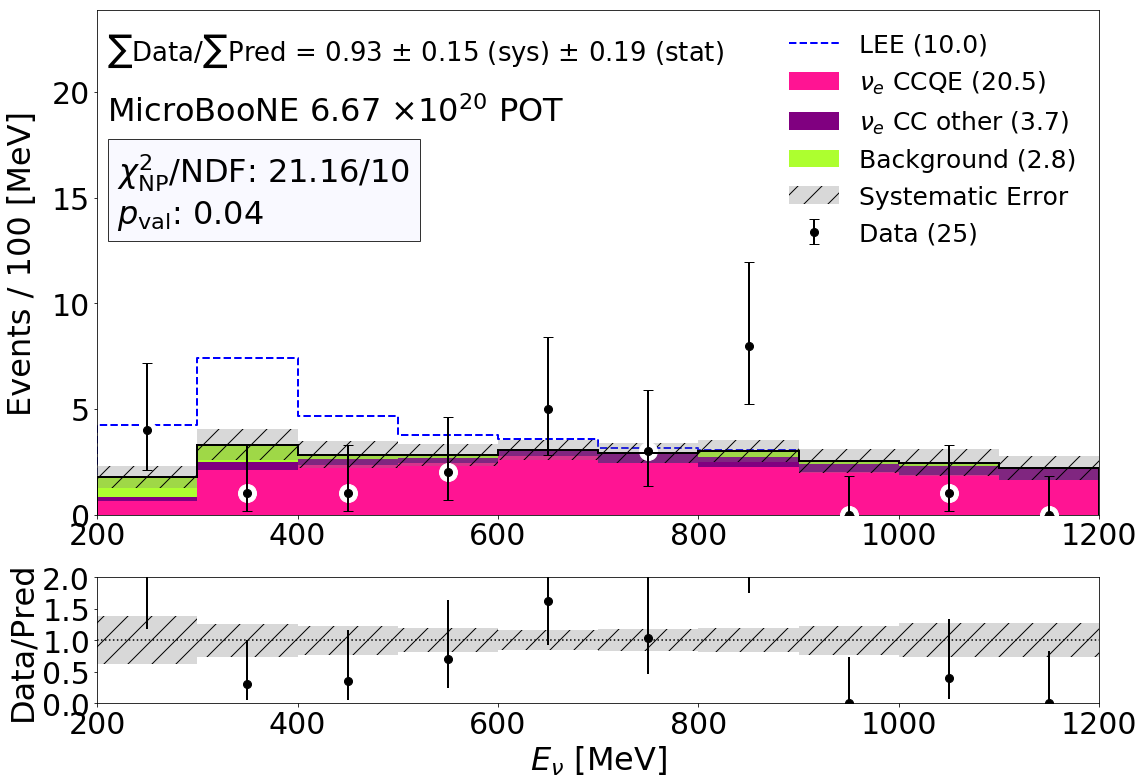

-6.174485024605285e-07


<Figure size 432x288 with 0 Axes>

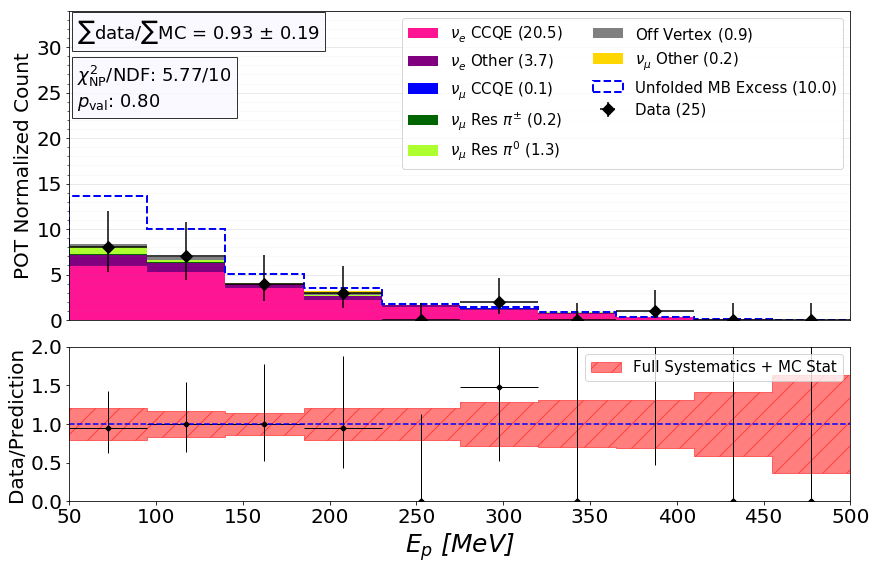

('Normalization Uncertainty:', 0.14315768368012904)
('yerr_mc_total', array([1.74341584, 1.13679337, 0.59187189, 0.64750585, 0.34522845,
       0.38634457, 0.26072578, 0.11341789, 0.03841289, 0.02955443]))
(0.5771013563303684, 0.8341207176245604)
(0, 8.407534924519249, 1.6614399191471365)
(1, 6.9736934023081085, 1.0757843514281138)
(2, 4.0193769642414905, 0.5748360221337698)
(3, 3.148557932166618, 0.5617770800324573)
(4, 1.6260725594803476, 0.333240328343361)
(5, 1.35614250466109, 0.35252176746091346)
(6, 0.8572132291503407, 0.23025286522184554)
(7, 0.3658201546312472, 0.10616996011195451)
(8, 0.0919646589957579, 0.03410485266876969)
(9, 0.04614566843080059, 0.025604987662987008)


<Figure size 432x288 with 0 Axes>

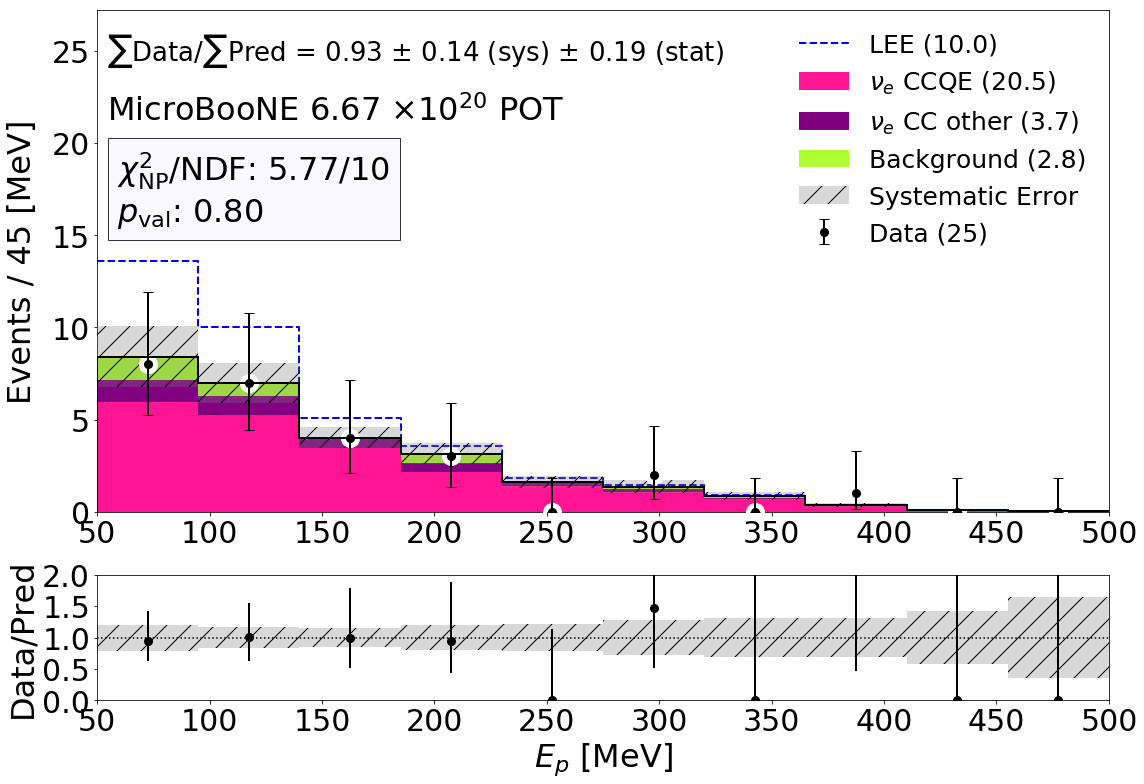

<Figure size 432x288 with 0 Axes>

In [5]:
##### Plot Settings
fudge_sig = 1.0
fudge_bkg = 1.0
plot_thresh = 0.1
vtxCut = 5
ElowX = 200

#Binary Settings
verbose = False
makeCutData = False
topplot = False
PRDplot = True
bkgBreakdown = False
useBkgPred = False
signalOnly = False
highE = False

#BDT Settings
bdtmode = 'avgscore'
nBDTs = 20
cut = range_dict['sigprob'][0]

tsavedir = 'TextFiles/'+tag+'/FinalSelection/'+bdtmode+'/BoxOpening/'
try: os.mkdir(tsavedir)
except OSError as error: print(error)
    
if fsiFix and signalOnly: freqpvalfile = 'signal_v55.txt'
if fsiFix and not signalOnly: freqpvalfile = 'full_v55.txt'
if not fsiFix and signalOnly: freqpvalfile = 'signal_v48.txt'
if not fsiFix and not signalOnly: freqpvalfile = 'full_v48.txt'
if fset==11: freqpvalfile = 'samp3_total.txt'
freqpvals = pd.read_csv('FreqPVals/'+freqpvalfile)


runs_to_plot = [#[1],
                #[2],
                #[3],
                [1,2,3]]

POTdict = {1:{ft:DAT_POT1 for ft in filetaglist[1]},
           2:{ft:DAT_POT2 for ft in filetaglist[2]},
           3:{ft:DAT_POT3 for ft in filetaglist[3]}}

if fset==12:
    POTdict[1]['data'] = DATA_POT_TOT
    POTdict[2]['data'] = DATA_POT_TOT
    POTdict[3]['data'] = DATA_POT_TOT
    
pvalsa = []
pvalsf = []

cls  = ['deeppink','purple','blue','cyan','darkgreen','greenyellow','gold','brown','gray','fuchsia']

if signalOnly: range_dict['Enu_1e1p'] = (200,500)
if highE: range_dict['Enu_1e1p'] = (200,2400)
else: range_dict['Enu_1e1p'] = (0,1200)
    


for varName in varb_names:


    
    if (useBkgPred or highE) and varName not in ['Enu_1e1p']: continue
    #if varName not in ['Electron_Edep','Lepton_ThetaReco','sigprob','EnuQE_lepton']: continue
    if varName not in  ['Enu_1e1p','Proton_Edep']: continue
    
        
    xlab = varlabel_dict[varName]
        
    bins  = 12 if varName in ['Enu_1e1p','EnuQE_proton','EnuQE_lepton','EnuTrue'] else 10
    if signalOnly:
        if varName=='Enu_1e1p': bins = 3
        else: bins/=2
    low   = (range_dict[varName])[0]
    high  = (range_dict[varName])[1]
    binrange = np.linspace(low,high,bins+1)
    if highE and varName=='Enu_1e1p':
        binrange = np.array([200,300,400,500,600,700,800,
                             900,1000,1100,1200,1600,2400])
        bins = 12
    
    
    for runs_included in runs_to_plot: # [run 1, run 2 run 3]
        
       
            
        if varName=='sigprob': low = cut

        plotTitle = 'Final Selection | Runs:'
        datLab = "Data"

        plotFileName = varName
        FullPOT = 0
        POT1 = 0
        POT23 = 0

        vars_arr = []
        weights_arr = []
        labels_arr = []
        leew_arr = []

        dflist = []
        dfdat = pd.DataFrame()
        dflee = pd.DataFrame()
        dftot = pd.DataFrame()

        bkginttype = {}
        onvbkginttype = {}
        offvbkginttype = {}

        for r in runs_included:
            plotTitle += ' %i'%r
            plotFileName += '_%i'%r
            FullPOT += POTdict[r]['overlay']
            if r == 1: POT1 += POTdict[r]['overlay']
            elif r in [2,3]: POT23 += POTdict[r]['overlay']

            for filetag in df[r].keys():
                if not lowEpatch and 'lowE' in filetag: continue
                if useBkgPred and filetag in ['overlay','ncpi0','ccpi0','ext']: continue
                dfc = df[r][filetag].copy()

                if filetag!='data' or makeCutData:
                    MakeAvgBDTcut(dfc,cut,nBDTs,(r==2 and filetag=='overlay'),ttc=0.1)
                else:
                    dfc.rename(columns={"BDTscore_1e1p": "oldBDTscore"},inplace=True)
                    dfc['sigprobavg'] = dfc['oldBDTscore']
                    dfc['sigprobmedian'] = -1
                    dfc['sigprobmax'] = -1
                    dfc['sigprob'] = dfc['oldBDTscore']
                    dfc['bdtweight'] = np.where(np.array(dfc['sigprob'])>cut,1,0)
                    dfc.sort_values(by=['run','subrun','event','sigprob'],ascending=False,inplace=True)
                    if r==2 and filetag=='overlay':
                        dfc.drop_duplicates(subset=['run','subrun','event','EnuTrue'],inplace=True)
                    else:
                        dfc.drop_duplicates(subset=['run','subrun','event'],inplace=True)
            

                
                vars_arr += list(dfc[varName])
                numu_l = np.core.defchararray.find(np.array(dfc['label'],dtype=np.string_),'m')!=-1
                labels = np.where(np.logical_and(numu_l,dfc['scedr']>vtxCut),'offvtx',dfc['label'])
                
                dfc['label'] = labels
                labels_arr += list(labels)


                weights = dfc['GenieWeight'] * dfc['POTweight']**(-1) * POTdict[r][filetag]
                weights*= dfc['bdtweight']
                weights*=dfc['sigprob']>range_dict['sigprob'][0]
                weights*=dfc['sigprob']<range_dict['sigprob'][1]
                weights*=dfc['Enu_1e1p']>ElowX
                weights*=dfc['Enu_1e1p']<range_dict['Enu_1e1p'][1]
                if signalOnly: weights*=dfc['Enu_1e1p']<500

                

                leeweights = dfc['LEEweight'] * weights

                if filetag!='intrinsics': leeweights*=0

                weights_arr += list(weights)
                leew_arr += list(leeweights)
                
                dfc_lee = dfc.copy()
                dfc['weights'] = weights
                dfc_lee['weights'] = leeweights

                
                if varName=='Enu_1e1p': SaveTextFile(dfc.query('weights>0'),r,filetag+'_fset12_withTrueEe',0.0,tsavedir)
                    
                
                if filetag=='data':
                    dfdat = pd.concat((dfdat,dfc.query('weights>0')))
                else:
                    dflee = pd.concat((dflee,dfc_lee))
                    dftot = pd.concat((dftot,dfc))
                    dflist.append(dfc)




        
        

        



        plotTitle += r' | BDT cut: '+str(cut)

        label_arr = np.array(labels_arr)
        var_arr = np.array(vars_arr)
        weight_arr = np.array(weights_arr)

        data = list(var_arr[label_arr=='data'])
        nueO = list(var_arr[label_arr=='nue_ccqe'])
        nue = list(var_arr[label_arr=='nue_other'])
        ccqe = list(var_arr[label_arr=='numu_ccqe'])
        mec = list(var_arr[label_arr=='numu_mec'])
        pipm = list(var_arr[label_arr=='numu_pipm'])
        pi0 = list(var_arr[label_arr=='numu_pi0'])
        other = list(var_arr[label_arr=='numu_other'])
        dirtVar = []
        offv = list(var_arr[label_arr=='offvtx'])
        extVar = list(var_arr[label_arr=='EXTBNB'])
        lee = list(var_arr)

        ovrw1 = list(fudge_bkg*weight_arr[label_arr=='numu_ccqe'])
        ovrw2 = list(fudge_bkg*weight_arr[label_arr=='numu_mec'])
        ovrw3 = list(fudge_bkg*weight_arr[label_arr=='numu_pipm'])
        ovrw4 = list(fudge_bkg*weight_arr[label_arr=='numu_pi0'])
        ovrw5 = list(fudge_bkg*weight_arr[label_arr=='numu_other'])
        ovrw6 = list(fudge_bkg*weight_arr[label_arr=='offvtx'])
        ovrw7 = list(fudge_sig*weight_arr[label_arr=='nue_other'])
        ovrw8 = list(fudge_sig*weight_arr[label_arr=='nue_ccqe'])
        dirtw = []
        extw = list(weight_arr[label_arr=='EXTBNB'])
        leew = leew_arr
        datw = list(weight_arr[label_arr=='data'])
        


        d      = plt.hist(data,weights=datw,bins=binrange,normed=0)
        xbins  = [(d[1][i]+d[1][i+1])/2.0 for i in range(len(d[1])-1)]
        xbin_edges = d[1]
        vals = d[0]
        valerrs = poisson_errors(vals)
        binwid = d[1][1:]-d[1][:-1]
        plt.clf()




        wghs = [[x for x in ovrw8],
                [x for x in ovrw7],
                [x for x in ovrw1],
                [x for x in  ovrw2],
                [x for x in ovrw3],
                [x for x in  ovrw4],
                [x for x in ovrw5],
                [x for x in dirtw],
                [x for x in ovrw6],
                [x for x in extw],
                [x for x in leew]]

        mcErW = [[x**2 for x in ovrw8],
                 [x**2 for x in ovrw7],
                 [x**2 for x in ovrw1],
                 [x**2 for x in  ovrw2],
                 [x**2 for x in ovrw3],
                 [x**2 for x in  ovrw4],
                 [x**2 for x in ovrw5],
                 [x**2 for x in dirtw],
                 [x**2 for x in ovrw6],
                 [x**2 for x in extw]]



        r = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar],bins=binrange,stacked='True',normed=0,weights=mcErW)
        nueO_mcErr  = [sqrt(r[0][0][i]- 0) for i in range(bins)]
        nue_mcErr   = [sqrt(r[0][1][i]-r[0][0][i]) for i in range(bins)]
        ccqe_mcErr  = [sqrt(r[0][2][i]-r[0][1][i]) for i in range(bins)]
        mec_mcErr   = [sqrt(r[0][3][i]-r[0][2][i]) for i in range(bins)]
        pipm_mcErr  = [sqrt(r[0][4][i]-r[0][3][i]) for i in range(bins)]
        pi0_mcErr   = [sqrt(r[0][5][i]-r[0][4][i]) for i in range(bins)]
        other_mcErr = [sqrt(r[0][6][i]-r[0][5][i]) for i in range(bins)]
        dirt_mcErr  = [sqrt(r[0][7][i]-r[0][6][i]) for i in range(bins)]
        offv_mcErr  = [sqrt(r[0][8][i]-r[0][7][i]) for i in range(bins)]
        ext_mcErr   = [sqrt(r[0][9][i]-r[0][8][i]) for i in range(bins)]
        if useBkgPred and varName=='Enu_1e1p':
            stkerr =  [sqrt( 
                       nueO_mcErr[i]**2  + 
                       nue_mcErr[i]**2 )
                       for i in range(bins) 
                      ]
        else:
            stkerr =  [sqrt( 
                       nueO_mcErr[i]**2  + 
                       nue_mcErr[i]**2  + 
                       ccqe_mcErr[i]**2  + 
                       mec_mcErr[i]**2  + 
                       pipm_mcErr[i]**2  + 
                       pi0_mcErr[i]**2  + 
                       other_mcErr[i]**2  + 
                       dirt_mcErr[i]**2 + 
                       offv_mcErr[i]**2 +  
                       ext_mcErr[i]**2 )
                       for i in range(bins) 
                      ]
        stkerr = np.array(stkerr)
        bkgErr = sum([ (ccqe_mcErr[i]**2  + 
                   mec_mcErr[i]**2  + 
                   pipm_mcErr[i]**2  + 
                   pi0_mcErr[i]**2  + 
                   other_mcErr[i]**2  + 
                   dirt_mcErr[i]**2 + 
                   offv_mcErr[i]**2 +  
                   ext_mcErr[i]**2 )
                   for i in range(bins) 
                  ])




        plt.clf()

        pli = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar,lee],bins=binrange,weights=wghs,stacked='True',normed=0)
        plt.clf()

        nums = [sum(x for x in pli[0][0]           ),
                sum(x for x in pli[0][1] -pli[0][0]),
                sum(x for x in pli[0][2] -pli[0][1]),
                sum(x for x in pli[0][3] -pli[0][2]),
                sum(x for x in pli[0][4] -pli[0][3]),
                sum(x for x in pli[0][5] -pli[0][4]),
                sum(x for x in pli[0][6] -pli[0][5]),
                sum(x for x in pli[0][7] -pli[0][6]),
                sum(x for x in pli[0][8] -pli[0][7]),
                sum(x for x in pli[0][9] -pli[0][8]),        
                sum(x for x in pli[0][10]-pli[0][9]),
                sum(x for x in vals)
                ]


        labs = [r'$\nu_e^{ }$ CCQE (%.1f)'%nums[0],
                r'$\nu_e^{ }$ Other (%.1f)'%nums[1],
                r"$\nu_\mu^{ }$ CCQE (%.1f)"%nums[2],
                r"$\nu_\mu$ MEC (%.1f)"%nums[3],
                r"$\nu_\mu$ Res $\pi^{\pm}$ (%.1f)"%nums[4],
                r"$\nu_\mu$ Res $\pi^0$ (%.1f)"%nums[5],
                r"$\nu_\mu^{ }$ Other (%.1f)"%nums[6],
                r"Dirt$_{ }^{ }$ (%.1f)"%nums[7],
                r"Off Vertex$_{ }^{ }$ (%.1f)"%nums[8],
                "External (%.1f)"%nums[9]]


        ## ----------------------- ##

        cats = [ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar]
        cats_to_plot = [nueO,nue]
        labs_to_plot = [labs[0],labs[1]]
        wghs_to_plot = [wghs[0],wghs[1]]
        cls_to_plot = [cls[0],cls[1]]
        other_to_plot = other
        other_wghs = wghs[6]
        other_num = nums[6]
        for i,(n,l,w,cl,c) in enumerate(zip(nums[2:10],labs[2:10],wghs[2:10],cls[2:10],cats)):
            if 'Other' in l: continue
            if n>plot_thresh:
                cats_to_plot.append(c)
                wghs_to_plot.append(w)
                labs_to_plot.append(l)
                cls_to_plot.append(cl)
            else:
                other_to_plot+=c
                other_num+=n
                other_wghs+=w
        cats_to_plot.append(other_to_plot)
        cls_to_plot.append(cls[-4])
        labs_to_plot.append(r"$\nu_\mu^{ }$ Other (%.1f)"%other_num)
        wghs_to_plot.append(other_wghs)




        fig, ax = plt.subplots(figsize=(14,9.5))
        plt.subplot2grid((100,100),(0,0),colspan=100,rowspan=60)

        p = plt.hist(cats_to_plot,bins=binrange,weights=wghs_to_plot,stacked='True',color=cls_to_plot,label=labs_to_plot,normed=0)
        pl =plt.hist(nueO+nue+ccqe+mec+pipm+pi0+other+dirtVar+offv+extVar+lee,bins=binrange,weights=wghs[0]+wghs[1]+wghs[2]+wghs[3]+wghs[4]+wghs[5]+wghs[6]+wghs[7]+wghs[8]+wghs[9]+wghs[10],stacked='False',histtype='step',lw=2,color='blue',ls='--',label="Unfolded MB Excess (%.1f)"%nums[10])
        plt.errorbar(xbins,vals,xerr=binwid/2,yerr=valerrs,marker='D',ls='None',color='black',ms=8,label="%s (%i)"%(datLab,nums[11]),elinewidth=1.5)


        if varName=='Enu_1e1p': enu_unconstr = p[0][1]
        if verbose:
            print('Bin by bin prediction:',p[0][-1])
            print('Bin by bin nue prediction:',p[0][1])
            print('Bin by bin numu prediction:',p[0][-1]-p[0][1])
            print('Total prediction:',sum(p[0][-1]))
            print('Data:',vals)

        ylow  = 0
        yhigh = 2.5*max([max(vals),max(pl[0])])


        major_xticks = arange(low, high*1.01, 20)
        minor_xticks = arange(low, high*1.01, 5)
        major_yticks = arange(ylow, yhigh+1, 50)
        minor_yticks = arange(ylow, yhigh+1, 10)
        
        ## ------------------------ ##
        ## Systematics Calculation
        
        if highE:
            rwt_sys_m = np.loadtxt('CovMatrices/RwghtSys/frac_covar_rewgt_nu_energy_reco_extended.txt')
            det_sys_m = np.loadtxt('CovMatrices/DetVar/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/2August2021/covMatrix/avgscore/BDTcut0.95/extendedE/detsys_Enu_1e1p_run13_cutMode3_cov_smooth.csv',delimiter=',')
        else: rwt_sys_m,det_sys_m = getSysErrors(bins,varName,signalOnly)
        sys_label = 'Full Systematics + MC Stat'
        
        nue = p[0][1]
        if useBkgPred and varName=='Enu_1e1p':
            numu = np.array([0., 0.06560813340055466, 0.9039335005712937, 0.734679253871699, 0.2971413557261733,
            0.1252589581117852, 0.08095061210365051, 0.09068226486790713, 0.13007756574420123,
            0.19334216996341605, 0.2814833445914375, 0.398172197517684])
            numu[1] = 0
            cols = dflist[0].columns
            dfNumuFit = pd.DataFrame([-1*np.ones(len(cols)) for _ in numu], columns=cols)
            dfNumuFit['Enu_1e1p'] = np.linspace(50,1150,12)
            dfNumuFit['weights'] = numu
            dfNumuFit['label'] = 'bkgfit'
            dfNumuFit['ccnc'] = 0
            dflist.append(dfNumuFit)
            dftot = pd.concat((dftot,dfNumuFit))
        else: numu = p[0][-1]-p[0][1]
        nueother = dftot.query('(filetag==\'overlay\' or \
                                 filetag==\'ncpi0\' or  \
                                 filetag==\'ccpi0\') and \
                                 label==\'nue_other\' and \
                                 weights>0')

        nueotherdist,_ = np.histogram(np.array(nueother[varName]),bins=binrange,weights=np.array(nueother['weights']))
        nue-=nueotherdist
        numu+=nueotherdist
        tot = nue+numu
        

        cov = np.zeros((bins,bins))
        for j in range(bins):
            cov[j][j] = cov_cnp(vals[j],tot[j]) + stkerr[j]**2

        det_sys_m = getDetSysTot(det_sys_m,nue,numu)
        cov += det_sys_m * np.outer(tot,tot)
        cov += rwt_sys_m * np.outer(tot,tot)
        if useBkgPred and varName=='Enu_1e1p':
            numustat = np.zeros((12,12))
            numustatin = np.loadtxt('BackgroundFitterOutput/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/CDF/avgscore/bkg_0.95_cov.txt')
            numustat[1:,1:] = numustatin
            cov += numustat * np.outer(numu,numu)
            
            covpad = np.loadtxt('frac_covar_v48_total_coll.txt')
            cov[2:,2:] = covpad * np.outer(tot[2:],tot[2:])
            fcov = cov / np.outer(tot,tot)
            for j in range(bins): cov[j][j] += cov_cnp(vals[j],tot[j])

        mask1D = np.where(tot==0,False,True)
        mask2D = np.outer(mask1D,mask1D)



        Del = (vals - tot)[mask1D]
        cov = cov[mask2D].reshape((len(Del),len(Del)))
        chi2 = np.matmul(np.matmul(Del,np.linalg.inv(cov)),Del)
        pval = 1 - stats.chi2.cdf(chi2,len(Del))
        pvalsa.append(pval)

           

        rwt_sys = np.array([rwt_sys_m[j][j] for j in range(bins)])
        det_sys = np.array([det_sys_m[j][j] for j in range(bins)])
        sys_errs = np.sqrt(rwt_sys + det_sys + stkerr**2/tot**2)
        
        sys_low = np.append((p[0][-1] * (1 - sys_errs)),0)
        rsys_low = np.append(1-sys_errs,(1-sys_errs)[-1])
        sys_high = np.append((p[0][-1] * (1 + sys_errs)),0)
        rsys_high = np.append(1+sys_errs,(1+sys_errs)[-1])
        sys_low = np.where(np.isnan(sys_low),0,sys_low)
        sys_high = np.where(np.isnan(sys_high),0,sys_high)
        rsys_low = np.where(np.isnan(rsys_low),1,rsys_low)
        rsys_high = np.where(np.isnan(rsys_high),1,rsys_high)
        
        ## ------------------------ ##


        
        
        
        
        #plt.fill_between(xbin_edges,sys_low,sys_high,step='post',hatch='/',label=sys_label,color='red',edgecolor='black',alpha=0.5)



        #plt.title(plotTitle,fontsize=20)
        plt.legend(loc='upper right',fontsize=15,ncol=2)
        plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.17)
        plt.minorticks_on()
        plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.07)
        plt.yticks(fontsize=20)
        ax.set_yticks(major_yticks)
        ax.set_yticks(minor_yticks,minor=True)
        plt.xticks([])
        plt.ylim((ylow,yhigh))
        plt.xlim((low,high))
        if varName=='Enu_1e1p': plt.xlim((ElowX,high))
        #plt.semilogy()
        plt.ylabel("POT Normalized Count",fontsize=20)

        plt.annotate(r'$\sum$data/$\sum$MC = %.2f $\pm$ %.2f'%(vals.sum()/float(p[0][-1].sum()),np.sqrt(vals.sum())/float(p[0][-1].sum())),xy=(0.01,.91),xycoords='axes fraction',fontsize=18,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
        try:
            #plt.annotate(r'$\chi^2_{\rm NP}$/NDF: %2.2f/%i'%(chi2,len(Del))+'\n'+r'$p_{\rm ana}$: %2.2f, $p_{\rm freq}$: %2.2f'%(pval,float(freqpvals.query('varName==@varName')['pval'])),xy=(0.01,.69),xycoords='axes fraction',fontsize=18,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
            plt.annotate(r'$\chi^2_{\rm NP}$/NDF: %2.2f/%i'%(chi2,len(Del))+'\n'+r'$p_{\rm val}$: %2.2f'%(float(freqpvals.query('varName==@varName')['pval'])),xy=(0.01,.69),xycoords='axes fraction',fontsize=18,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
            pvalsf.append(float(freqpvals.query('varName==@varName')['pval']))
            print((float(freqpvals.query('varName==@varName')['chi2'])-chi2)/chi2)
        except:
            plt.annotate(r'$\chi^2_{\rm NP}$/NDF: %2.2f/%i'%(chi2,len(Del))+'\n'+r'$p_{\rm ana}$: %2.2f, $p_{\rm freq}$: N/A'%(pval),xy=(0.01,.69),xycoords='axes fraction',fontsize=18,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))


        

        plt.subplot2grid((100,100),(65,0),colspan=100,rowspan=30)

        rat    = [vals[i]/p[0][-1][i] for i in range(bins)]
        raterr = ([valerrs[0][i]/p[0][-1][i] if p[0][-1][i] > 0 else sqrt(2) for i in range(bins)],[valerrs[1][i]/p[0][-1][i] if p[0][-1][i] > 0 else sqrt(2) for i in range(bins)])
        plt.errorbar(xbins,rat,yerr=raterr,xerr=binwid/2.0,marker='D',ls='None',color='black',ms=4,elinewidth=1)

        plt.fill_between(xbin_edges,rsys_low,rsys_high,step='post',hatch='/',label=sys_label,color='red',edgecolor='black',alpha=0.5)
        

        plt.legend(loc='upper right',fontsize=15,ncol=1)
        plt.axhline(y=1.0,ls='--',color='blue')
        plt.xlabel(xlab,fontsize=25,style='italic')
        plt.ylabel("Data/Prediction",fontsize=20)
        plt.ylim((0,2))
        plt.xlim((low,high))
        if varName=='Enu_1e1p': plt.xlim((ElowX,high))
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        ax.set_xticks(major_xticks)
        ax.set_xticks(minor_xticks,minor=True)

        if useBkgPred: plotFileName+='_bkgFit'
        
        plt.savefig('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+plotFileName+'_cutLevel3.png',dpi=100)
        plt.show()
        pkl.dump(  plt.gcf(),  open('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+plotFileName+'_cutLevel3.pickle',  'wb')  )
        plt.clf()
        
        ## ------------------------ ##
        ## Davio Plotter: topological breakdown

        if topplot and varName=='Enu_1e1p':


            open_Hists = StackedHisto(tuple(dflist),(np.ones(len(dflist))))
            open_Hists.AddStrata('(parentPDG==12 or parentPDG==-12) and \
                                  nlepton==1 and nproton==1',"1e1p",cls[0])
            #open_Hists.AddStrata('(parentPDG==12 or parentPDG==-12) and \
            #                      nlepton==0 and nproton==1',"0e1p",cls[0])
            
            open_Hists.AddStrata('(parentPDG==12 or parentPDG==-12) and \
                                  nlepton==1 and nproton!=1',"1eX",cls[1])
            #open_Hists.AddStrata('(parentPDG==12 or parentPDG==-12) and \
            #                      nlepton==0 and nproton!=1',"0eX",cls[1])
            
            if not useBkgPred: open_Hists.AddStrata('(parentPDG!=12 and parentPDG!=-12) or nlepton!=1',r"Background",cls[5])
            else:  open_Hists.AddStrata('label==\'bkgfit\'',"Fitted\nBackground",cls[5])

            
            open_DataHist = SimpleHisto(dfdat,1.0,0,'',datLab)
            if useBkgPred:
                fig1,ax0,ax1,a,vals_mc_bw = distplot_wratio_davio(varName,binrange,open_Hists,open_DataHist,varlabel_dict[varName],m_cov=np.copy(fcov),consFac=0.05,addMCstat=False)
            else:
                fig1,ax0,ax1,a,vals_mc_bw = distplot_wratio_davio(varName,binrange,open_Hists,open_DataHist,varlabel_dict[varName],m_cov=rwt_sys_m+det_sys_m,consFac=0.05)
            pl = ax0.hist(list((dftot)[varName])+list((dflee)[varName]),bins=binrange,weights=list((dftot)['weights'])+list((dflee)['weights']),stacked='False',histtype='step',lw=2,color='blue',ls='--',label=r"LEE (%.1f)"%sum((dflee.query('Enu_1e1p<1200'))['weights']))
            ax0.legend(loc='upper right',fontsize=25,frameon=False,ncol=1)
            #ax0.set_xticks([])
            ax0.set_ylim((0,max(2*max(pl[0]),ax0.get_ylim()[1])))
            if varName=='Enu_1e1p': 
                ax0.set_xlim((ElowX,high))
                ax1.set_xlim((ElowX,high))
            plt.setp(ax1.get_xticklabels(), fontsize=30)
            plt.setp(ax0.get_yticklabels(), fontsize=30)
            plt.setp(ax1.get_yticklabels(), fontsize=30)
            
            if not useBkgPred:
                ax0.annotate(r'$\chi^2_{\rm NP}$/NDF: %2.2f/%i'%(chi2,len(Del))+'\n'+r'$p_{\rm val}$: %2.2f'%(float(freqpvals.query('varName==@varName')['pval'])),xy=(0.02,.58),xycoords='axes fraction',fontsize=32,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
            


            #ax1.set_ylim((0,5*max(pl[0])))
            ax0.set_title(plotTitle,fontsize=30)
            ax0.set_title('',fontsize=0)
            ax0.annotate(r'MicroBooNE %2.2f $\times 10^{20}$ POT'%(FullPOT/10**20),xy=(0.01,0.78),xycoords='axes fraction',fontsize=32)
            plt.tight_layout()
            plt.savefig('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+plotFileName+'_TopPlot.png',dpi=100)
            plt.show()
            pkl.dump(  plt.gcf(),  open('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+plotFileName+'_TopPlot.pickle',  'wb')  )
            plt.clf()                
            

        ## ------------------------ ##
        
        ## ------------------------ ##
        ## Davio Plotter: Final Plot

        if PRDplot:


            open_Hists = StackedHisto(tuple(dflist),(np.ones(len(dflist))))
            open_Hists.AddStrata('label==\'nue_ccqe\'',r"$\nu_e$ CCQE",cls[0])
            open_Hists.AddStrata('label==\'nue_other\' and not ccnc',r"$\nu_e$ CC other",cls[1])
            if not useBkgPred: open_Hists.AddStrata('label!=\'nue_ccqe\' and (label!=\'nue_other\' or ccnc)',r"Background",cls[5])
            else:  open_Hists.AddStrata('label==\'bkgfit\'',"Fitted\nBackground",cls[5])
    
            
            open_DataHist = SimpleHisto(dfdat,1.0,0,'',datLab)
            if useBkgPred:
                fig1,ax0,ax1,a,vals_mc_bw = distplot_wratio_davio(varName,binrange,open_Hists,open_DataHist,varlabel_dict[varName],m_cov=np.copy(fcov),consFac=0.05,addMCstat=False)
            else:
                fig1,ax0,ax1,a,vals_mc_bw = distplot_wratio_davio(varName,binrange,open_Hists,open_DataHist,varlabel_dict[varName],m_cov=rwt_sys_m+det_sys_m,consFac=0.05)
            leecont,_ = np.histogram((dflee)[varName],bins=binrange,weights=(dflee)['weights'])
            leeplot = leecont + vals_mc_bw
            leeplot = np.append(leeplot,leeplot[-1])
            ax0.plot(xbin_edges,leeplot, lw=2,color='blue',ls='--',label=r"LEE (%.1f)"%sum((dflee)['weights']),drawstyle='steps-post')
            ax0.set_ylim((0,max(2*max(pl[0]),ax0.get_ylim()[1])))
            #ax0.set_xticks([])
            #ax1.set_ylim((0,2))
            
            if fset==11 and varName=='Enu_1e1p':
                bkg_7 = np.loadtxt('BackgroundFitterOutput/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/CDF/avgscore/bkg7.txt')[1:]
                bkg_95 = np.loadtxt('BackgroundFitterOutput/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/CDF/avgscore/bkg95.txt')[1:]
                bkgmid = bkg_7-bkg_95
                fit = nue[2:]+bkgmid
                fit = np.append(fit,fit[-1])
                ax0.plot(xbin_edges[2:],fit,label=r'Background Fit'+'\n'+r'+ $\nu_e$ Simulation',color='red',linewidth=4,drawstyle='steps-post')
                handles, labels = ax0.get_legend_handles_labels()
                order = [1,2,3,0,4,5]
                ax0.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper right',fontsize=25,frameon=False,ncol=1)
            else: ax0.legend(loc='upper right',fontsize=25,frameon=False,ncol=1)
            if varName=='Enu_1e1p': 
                ax0.set_xlim((ElowX,high))
                ax1.set_xlim((ElowX,high))
            plt.setp(ax0.get_xticklabels(), fontsize=30)
            plt.setp(ax1.get_xticklabels(), fontsize=30)
            plt.setp(ax0.get_yticklabels(), fontsize=30)
            plt.setp(ax1.get_yticklabels(), fontsize=30)
            
            
                
            
            if not useBkgPred and fset==12:
                ax0.annotate(r'$\chi^2_{\rm NP}$/NDF: %2.2f/%i'%(chi2,len(Del))+'\n'+r'$p_{\rm val}$: %2.2f'%(float(freqpvals.query('varName==@varName')['pval'])),xy=(0.02,.58),xycoords='axes fraction',fontsize=32,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
            

            
            ax0.set_title(plotTitle,fontsize=30)
            ax0.set_title('',fontsize=0)
            ax0.annotate(r'MicroBooNE %2.2f $\times 10^{20}$ POT'%(FullPOT/10**20),xy=(0.01,0.78),xycoords='axes fraction',fontsize=32)
            fig1.align_ylabels()
            plt.tight_layout()
            plt.savefig('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+plotFileName+'_PRDPlot.png',dpi=100)
            plt.show()
            pkl.dump(  plt.gcf(),  open('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+plotFileName+'_PRDPlot.pickle',  'wb')  )
            plt.clf()                
            

        ## ------------------------ ##
        
        ## ------------------------ ##
        ## Davio Plotter: BAckground Plot

        if bkgBreakdown and varName=='Enu_1e1p' and not useBkgPred:


            open_Hists = StackedHisto(tuple(dflist),(np.ones(len(dflist))))

            open_Hists.AddStrata('label==\'numu_ccqe\'',r'$\nu_\mu$ CCQE',cls[2])
            #open_Hists.AddStrata('label==\'numu_mec\'',r'$\nu_\mu$ MEC',cls[3])
            open_Hists.AddStrata('label==\'numu_pipm\'',r'$\nu_\mu$ $\pi^\pm$',cls[4])
            open_Hists.AddStrata('label==\'numu_pi0\'',r'$\nu_\mu$ $\pi^0$',cls[5])
            open_Hists.AddStrata('label==\'numu_other\'',r'$\nu_\mu$ other',cls[6])
            open_Hists.AddStrata('label==\'offvtx\'',r'Off Vertex',cls[8])
            
            fig1,ax = distplot_mc(varName,1,(low,high),open_Hists,varlabel_dict[varName])
            
            ax.set_xlim((ElowX,high))

            plt.setp(ax.get_xticklabels(), fontsize=30)
            plt.setp(ax.get_yticklabels(), fontsize=30)
            
            
            ax0.set_title(plotTitle,fontsize=30)
            ax0.set_title('',fontsize=0)
            plt.tight_layout()
            plt.savefig('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+plotFileName+'_bkgBreakdown.png',dpi=100)
            plt.show()
            pkl.dump(  plt.gcf(),  open('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+plotFileName+'_bkgBreakdown.pickle',  'wb')  )
            plt.clf()                
            

        ## ------------------------ ##
        
        ## ------------------------ ##
        ## Davio Plotter: BAckground Plot top

        if bkgBreakdown and varName=='Enu_1e1p' and not useBkgPred:


            open_Hists = StackedHisto(tuple(dflist),(np.ones(len(dflist))))

            open_Hists.AddStrata('(parentPDG!=12 and parentPDG!=-12) and \
                                  nlepton==1 and npi0>=1 and scedr<5',r"$1\mu N\pi^0$",cls[5])
            open_Hists.AddStrata('(parentPDG!=12 and parentPDG!=-12) and \
                                  nlepton==0 and npi0>=1 and scedr<5',r"$0\mu N\pi^0$",cls[4])
            
            open_Hists.AddStrata('(parentPDG!=12 and parentPDG!=-12) and \
                                  nlepton==1 and nproton==1 and npi0<1 and scedr<5',r"$1\mu 1p$",cls[2])
            #open_Hists.AddStrata('(parentPDG!=12 and parentPDG!=-12) and \
            #                      nlepton==0 and nproton==1 and npi0<1 and scedr<5',"0m1p",cls[2])
            
            #open_Hists.AddStrata('(parentPDG!=12 and parentPDG!=-12) and \
            #                      nlepton==1 and nproton>1 and npi0<1 and scedr<5',"1mNp",cls[3])
            #open_Hists.AddStrata('(parentPDG!=12 and parentPDG!=-12) and \
            #                      nlepton==0 and nproton>1 and npi0<1 and scedr<5',"0mNp",cls[3])
            
            open_Hists.AddStrata('(parentPDG!=12 and parentPDG!=-12) and \
                                  scedr>=5',"Off Vertex",cls[8])
            #open_Hists.AddStrata('label==\'offvtx\'',"offvtx",cls[8])
            #open_Hists.AddStrata('label==\'EXTBNB\'','Cosmic Background',cls[9])
            
            fig1,ax = distplot_mc(varName,1,(low,high),open_Hists,varlabel_dict[varName])
            
            ax.set_xlim((ElowX,high))

            plt.setp(ax.get_xticklabels(), fontsize=30)
            plt.setp(ax.get_yticklabels(), fontsize=30)
            
            
            ax0.set_title(plotTitle,fontsize=30)
            ax0.set_title('',fontsize=0)
            plt.tight_layout()
            plt.savefig('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+plotFileName+'_bkgBreakdownTop.png',dpi=100)
            plt.show()
            pkl.dump(  plt.gcf(),  open('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+plotFileName+'_bkgBreakdownTop.pickle',  'wb')  )
            plt.clf()                
            

        ## ------------------------ ##
            

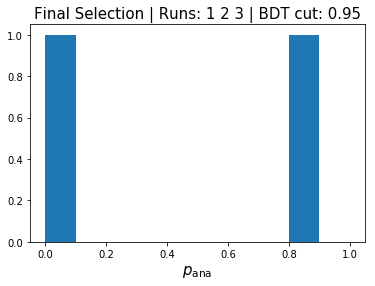

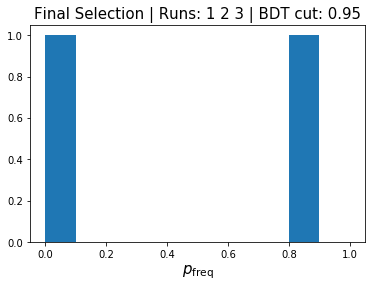

<Figure size 432x288 with 0 Axes>

In [6]:
plt.hist(pvalsa,bins=10,range=(0,1))
plt.xlabel(r'$p_{\rm ana}$',fontsize=15)
plt.title(plotTitle,fontsize=15)
plt.savefig('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/pvalsa.png')         
plt.show()
pkl.dump(  plt.gcf(),  open('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/pvalsa.pickle',  'wb')  )
plt.clf()

plt.hist(pvalsf,bins=10,range=(0,1))
plt.xlabel(r'$p_{\rm freq}$',fontsize=15)
plt.title(plotTitle,fontsize=15)
plt.savefig('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/pvalsf.png')         
plt.show()
pkl.dump(  plt.gcf(),  open('Plots/'+tag+'/SelectionPlots/FinalSelection/BoxOpening/'+'pvalsf.pickle',  'wb')  )
plt.clf()

# Constrained Prediction

In [7]:
v=2

#Preconstraint Numbers
numu_pre = [0., 0.06560813340055466, 0.9039335005712937, 0.734679253871699, 0.2971413557261733,
            0.1252589581117852, 0.08095061210365051, 0.09068226486790713, 0.13007756574420123,
            0.19334216996341605, 0.2814833445914375, 0.398172197517684]
nue_pre = enu_unconstr
print(sum(numu_pre[2:5]))
#Postconstraint Numbers
if v==1:
    nue = [0, 0.04158809, 0.8855908676514959, 2.919980898886305, 3.025017455321185, 2.9646116897062544, 3.266770695522819, 2.879444016019977, 2.8824777048214396, 2.5934829104462898, 2.3942977706684276, 2.0048856098998136]
    numu = [0, 0, 0.9039335005712937, 0.734679253871699, 0.2971413557261733, 0.1252589581117852, 0.08095061210365051, 0.09068226486790713, 0.13007756574420123, 0.19334216996341605, 0.2814833445914375, 0.398172197517684]  
    LEE = [0, 0, 2.7797009791304568, 4.834014299182774, 2.11482780778901, 0.9958640786434905, 0.5246843822643694, 0.2375132121921596, 0.07959937641268659, 0.005132815053084353, 0.0, 0.0]
elif v==2:
    nue = [0, 0.0415881, 0.883676, 2.91688, 3.0227, 2.96364, 3.26647, 2.87868, 2.88185, 2.59404, 2.39564, 2.00577]
    numu = [0, 0, 0.903934, 0.734679, 0.297141, 0.125259, 0.0809506, 0.0906823, 0.130078, 0.193342, 0.281483, 0.398172]
    LEE = [0, 0.0009147, 2.77318, 4.82673, 2.11293, 0.9954, 0.524564, 0.237461, 0.0795742, 0.00513413, 0, 0]

preconstraint = [numu_pre[i]+nue_pre[i] for i in range(len(numu_pre))]
print(sum(preconstraint[2:5]))
xbins = np.arange(0,1201,100)
xbinwidts = 0.5*(xbins[1:]-xbins[0:-1])
xbincenters = (xbins[0:-1]+xbins[1:])/2

lowm = 200
highm = 1200

data1 = pd.read_csv('TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/FinalSelection/avgscore/BoxOpening/eventlist_data_fset12_run1.txt',delimiter=' ').query('Enu_1e1p>200 and Enu_1e1p<1200')
data2 = pd.read_csv('TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/FinalSelection/avgscore/BoxOpening/eventlist_data_fset12_run2.txt',delimiter=' ').query('Enu_1e1p>200 and Enu_1e1p<1200')
data3 = pd.read_csv('TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/FinalSelection/avgscore/BoxOpening/eventlist_data_fset12_run3.txt',delimiter=' ').query('Enu_1e1p>200 and Enu_1e1p<1200')
data = pd.concat([data1,data2,data3])
mask = np.logical_and(xbincenters>lowm,xbincenters<highm)
mask2 = np.logical_not(np.logical_and(xbincenters>800,xbincenters<900))
#mask = np.logical_and(mask,mask2)
vals,_ = np.histogram(data.query('sigprob>0.95')['Enu_1e1p'],bins=xbins)
valerrs = poisson_errors(vals[mask])


nuep = np.array(nue+[nue[-1]])
numup = np.array(numu+[numu[-1]])

leep = [nue[0]+numu[0]]
prep = [preconstraint[0]]
xbinsline = [xbins[0]+1]
for i in range(len(LEE)):
    xbinsline.append(xbins[i]+1)
    xbinsline.append(xbins[i+1]+1)
    leep.append(nue[i]+numu[i]+LEE[i])
    leep.append(nue[i]+numu[i]+LEE[i])
    prep.append(preconstraint[i])
    prep.append(preconstraint[i])
    
if fsiFix: syserr = np.append(np.array([0,0]),np.sqrt(np.diag(np.loadtxt('frac_covar_v55_constr_coll.txt'))))
else: syserr = np.append(np.array([0,0]),np.sqrt(np.diag(np.loadtxt('frac_covar_v48_constr_coll.txt'))))
syserr = np.append(syserr,syserr[-1])
syserr = syserr*(nuep+numup)
syserrlow = nuep+numup-syserr
syserrhigh = nuep+numup+syserr


1.93575411017
7.856973041581558


[ 50.  95. 140. 185. 230. 275. 320. 365. 410. 455. 500.]
[1.78761   3.651559  3.319841  3.088899  3.3474206 2.9693623 3.011928
 2.787382  2.677123  2.403942 ]
[0 0 4 1 1 2 5 3 8 0 1 0]
[0, 0.0009147, 2.77318, 4.82673, 2.11293, 0.9954, 0.524564, 0.237461, 0.0795742, 0.00513413, 0, 0]
25.277045063268826 0.004844387526840022


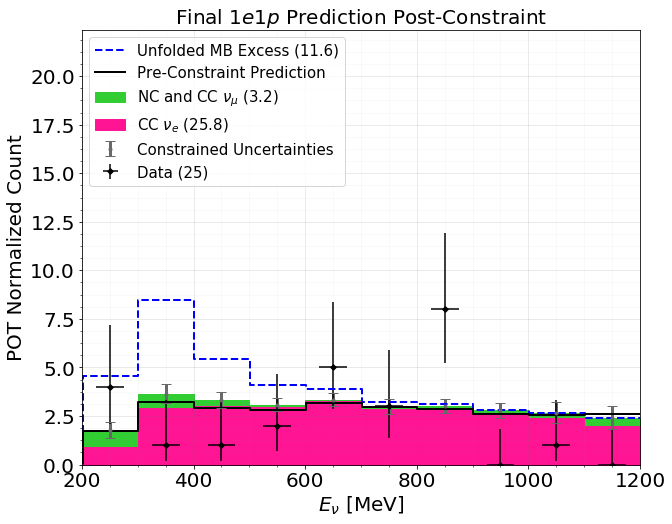

<Figure size 432x288 with 0 Axes>

In [8]:
# Chi Square

mask1D = np.logical_and(np.arange(250,1200,100)>lowm,np.arange(250,1200,100)<highm)
mask1D2 = np.logical_not(np.logical_and(np.arange(250,1200,100)>800,np.arange(250,1200,100)<900))
#mask1D = np.logical_and(mask1D,mask1D2)
mask2D = np.outer(mask1D,mask1D)

pred = np.array(nue)[mask] + np.array(numu)[mask]
print(xbin_edges)
print(pred)
print(vals)
print(LEE)

if fsiFix: 
    cov = np.loadtxt('frac_covar_v55_constr_coll.txt')[mask2D].reshape(len(pred),len(pred)) * np.outer(pred,pred)
    fraccov = np.loadtxt('frac_covar_v55_constr_coll.txt')[mask2D].reshape(len(pred),len(pred))
else: 
    cov = np.loadtxt('frac_covar_v48_constr_coll.txt')[mask2D].reshape(len(pred),len(pred)) * np.outer(pred,pred)
    fraccov = np.loadtxt('frac_covar_v48_constr_coll.txt')[mask2D].reshape(len(pred),len(pred))
fNorm_squared = cov.sum() / (pred.sum()**2)
for j in range(len(pred)):
    cov[j][j] += cov_cnp(vals[mask][j],pred[j])


Del = (vals[mask] - pred)



chi2 = np.matmul(np.matmul(Del,np.linalg.inv(cov)),Del)
pval = 1 - stats.chi2.cdf(chi2,len(Del))

print(chi2,pval)



# Plotting

yhigh = 2.8*max([max(pred),max(vals[mask])])
fig,ax = plt.subplots(figsize=(10,8))


plt.fill_between(xbins,np.zeros_like(xbins),nuep+numup,step='post',color='limegreen',label=r'NC and CC $\nu_\mu$ (%2.1f)'%sum(np.array(numu)[mask]))
plt.fill_between(xbins,np.zeros_like(xbins),nuep,step='post',color='deeppink',label=r'CC $\nu_e$ (%2.1f)'%sum(np.array(nue)[mask]))
plt.plot(xbinsline,leep,lw=2,color='blue',ls='--',label='Unfolded MB Excess (%2.1f)'%sum(np.array(LEE)[mask]))
#plt.fill_between(xbins,np.zeros_like(xbins),nuep+numup,step='post',color='limegreen',label=r'NC and CC $\nu_\mu$ (%2.1f)'%sum(numu)+'\n'+'(%2.1f >%i MeV)'%(sum(np.array(numu)[mask]),lowm))
#plt.fill_between(xbins,np.zeros_like(xbins),nuep,step='post',color='deeppink',label=r'CC $\nu_e$ (%2.1f)'%sum(nue)+'\n'+'(%2.1f > %2.0f MeV)'%(sum(np.array(nue)[mask]),lowm))
#plt.plot(xbinsline,leep,lw=2,color='blue',ls='--',label='Unfolded MB Excess (%2.1f)\n(%2.1f > %i MeV)'%(sum(LEE),sum(np.array(LEE)[mask]),lowm))

    
plt.plot(xbinsline,prep,lw=2,color='black',ls='-',label='Pre-Constraint Prediction')
plt.errorbar(xbincenters,[e+m for e,m in zip(nue,numu)],yerr=syserr[0:-1],color='dimgrey',label='Constrained Uncertainties',lw=3,fmt='.',capsize=5)

plt.errorbar(xbincenters[mask],vals[mask],xerr=xbinwidts[mask]/2,yerr=poisson_errors(vals[mask]),marker='D',ls='None',color='black',ms=4,label='Data (%i)'%sum(vals[mask]),elinewidth=1.5)

major_xticks = np.arange(200, 1200*1.01, 20)
minor_xticks = np.arange(200, 1200*1.01, 5)
major_yticks = np.arange(0, yhigh+1, 50)
minor_yticks = np.arange(0, yhigh+1, 10)

plt.legend(loc='upper left',fontsize=15,ncol=1)
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.17)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.07)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.ylim((0,yhigh))
plt.xlim((200,1200))

plt.ylabel("POT Normalized Count",fontsize=20)
plt.xlabel(r'$E_\nu$ [MeV]',fontsize=20)
plt.title(r'Final $1e1p$ Prediction Post-Constraint',fontsize=20)
#plt.text(700,0.95*yhigh,r'$\chi^2$/NDF ($p_{\rm ana}$): %2.2f/%i (%2.2f)'%(chi2,len(Del),pval),fontsize=17)

#plt.text(700,0.87*yhigh,r'$\sum$data/$\sum$MC = %.2f $\pm$ %.2f'%(vals[mask].sum()/float(pred.sum()),np.sqrt(vals.sum())/float(pred.sum())),fontsize=17)

#plt.tight_layout()
#plt.savefig('Plots/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionPlots/FinalSelection/BoxOpening/FinalConstrainedPlot.png',dpi=100)
plt.show()
plt.clf()

In [9]:
sel = data.query('sigprob>0.95 and Enu_1e1p > 200 and Enu_1e1p < 1200')
print(sel[['run','subrun','event','MinShrFrac','EnuQE_lepton','EnuQE_proton','Enu_1e1p','sigprob','Proton_Edep']])
for ev in np.array(sel[['run','subrun','event','Xreco','Yreco','Zreco','Enu_1e1p','Electron_Edep','Proton_Edep',
                        'Proton_ThetaReco','Lepton_ThetaReco','sigprob','MPIDY_proton']]):
    print(int(ev[0]),end=' & ')
    print(int(ev[1]),end=' & ')
    print(int(ev[2]),end=' & ')
    print('%3.2f'%ev[3],end=' & ')
    print('%3.2f'%ev[4],end=' & ')
    print('%3.2f'%ev[5],end=' & ')
    print('%3.2f'%ev[6],end=' & ')
    print('%3.2f'%ev[7],end=' & ')
    print('%3.2f'%ev[8],end=' & ')
    print('%3.3f'%np.cos(ev[9]),end=' & ')
    print('%3.3f'%np.cos(ev[10]),end=' & ')
    print('%3.3f'%ev[11],end=' & ')
    print('%3.3f'%ev[12],end=' \\\\\n')

      run  subrun  event  MinShrFrac  EnuQE_lepton  EnuQE_proton     Enu_1e1p  \
0    6622      96   4829         0.0    711.538070    746.432110   625.972118   
1    6546       8    448         0.0    161.985690    347.283830   225.201993   
2    6205      93   4668         0.0    744.256947   2293.060174   729.532773   
3    6115      66   3320         0.0    370.724991    484.028945   361.868039   
4    6046      72   3633         0.0   1200.179153 -12992.989655  1060.886170   
5    5418     119   5988         0.0    731.673534   1315.491539   766.065310   
6    5385     194   9704         0.0    585.156008    783.810370   677.934413   
0   11182     177   8875         0.0    704.501382 -12461.789065   894.710884   
1   10992      63   3189         0.0    655.608611    514.379727   586.783170   
2   10807      82   4146         0.0    454.218750    730.576897   636.637602   
3   10725      43   2181         0.0    884.039488    853.305735   813.781310   
4   10704     168   8406    

# Constrained Plot without Ratio

/home/nwkamp/.local/lib/python2.7/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/home/nwkamp/.local/lib/python2.7/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


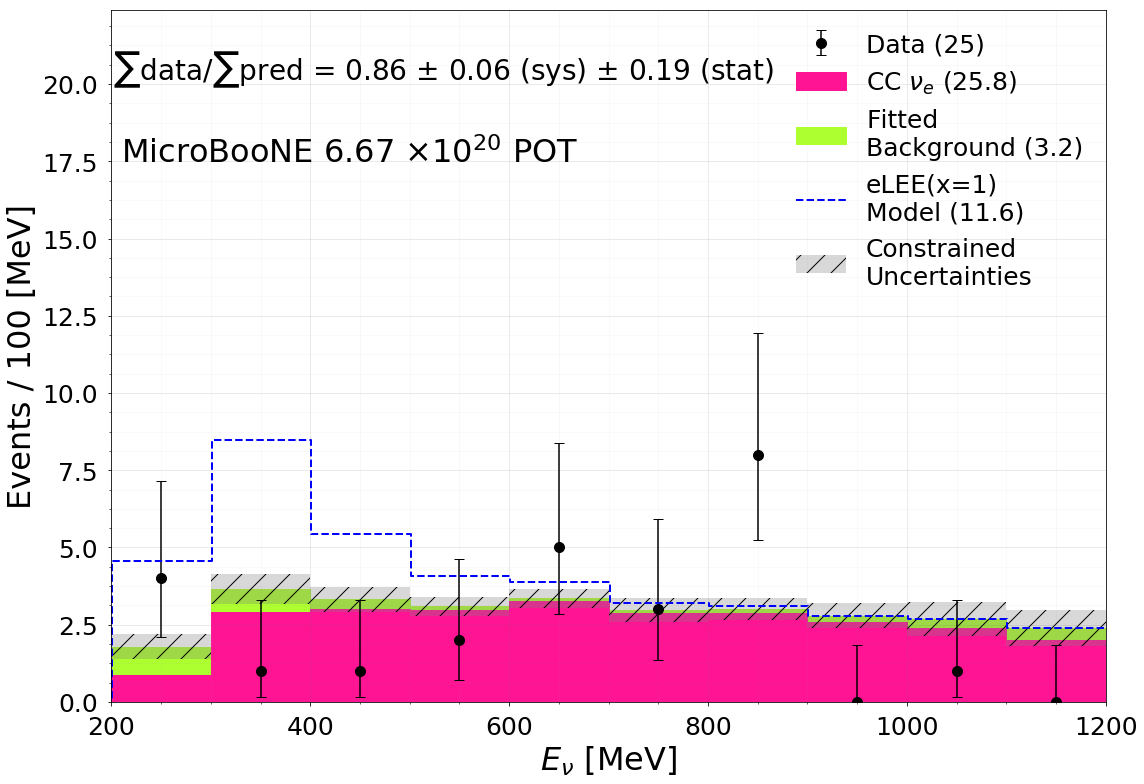

<Figure size 432x288 with 0 Axes>

In [10]:
fig,ax = plt.subplots(figsize=(16,11))
plt.subplot2grid((100,100),(0,0),colspan=100,rowspan=100)

plt.fill_between(xbins,np.zeros_like(xbins),nuep+numup,step='post',color='greenyellow',label='Fitted'+'\n'+r'Background (%2.1f)'%sum(np.array(numu)[mask]))
plt.fill_between(xbins,np.zeros_like(xbins),nuep,step='post',color='deeppink',label=r'CC $\nu_e$ (%2.1f)'%sum(np.array(nue)[mask]))
plt.plot(xbinsline,leep,lw=2,color='blue',ls='--',label='eLEE(x=1)\nModel (%2.1f)'%sum(np.array(LEE)[mask]))
#plt.fill_between(xbins,np.zeros_like(xbins),nuep+numup,step='post',color='limegreen',label=r'NC and CC $\nu_\mu$ (%2.1f)'%sum(numu)+'\n'+'(%2.1f >%i MeV)'%(sum(np.array(numu)[mask]),lowm))
#plt.fill_between(xbins,np.zeros_like(xbins),nuep,step='post',color='deeppink',label=r'CC $\nu_e$ (%2.1f)'%sum(nue)+'\n'+'(%2.1f > %2.0f MeV)'%(sum(np.array(nue)[mask]),lowm))
#plt.plot(xbinsline,leep,lw=2,color='blue',ls='--',label='Unfolded MB Excess (%2.1f)\n(%2.1f > %i MeV)'%(sum(LEE),sum(np.array(LEE)[mask]),lowm))

    
#plt.plot(xbinsline,prep,lw=2,color='black',ls='-',label='Pre-Constraint\nPrediction')
#plt.errorbar(xbincenters,[e+m for e,m in zip(nue,numu)],yerr=syserr[0:-1],color='dimgrey',label='Constrained Uncertainties',lw=3,fmt='.',capsize=5)

#plt.errorbar(xbincenters[mask],vals[mask],xerr=xbinwidts[mask],yerr=poisson_errors(vals[mask]),marker='D',ls='None',color='black',ms=5,label='Data (%i)'%sum(vals[mask]),elinewidth=1.5)
plt.errorbar(xbincenters[mask],vals[mask],yerr=poisson_errors(vals[mask]),marker='o',ls='None',color='black',ms=10,label='Data (%i)'%sum(vals[mask]),elinewidth=1.5,capsize=5)

major_xticks = np.arange(200, 1200*1.01, 20)
minor_xticks = np.arange(200, 1200*1.01, 5)
major_yticks = np.arange(0, yhigh+1, 50)
minor_yticks = np.arange(0, yhigh+1, 10)


plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.17)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.07)
fig.gca().tick_params(pad=10)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)


plt.fill_between(xbins[2:],(nuep[2:]+numup[2:])*(1-np.array([sqrt(fraccov[j][j]) for j in range(10)]+[0])),
                           (nuep[2:]+numup[2:])*(1+np.array([sqrt(fraccov[j][j]) for j in range(10)]+[0])),
                           step='post',label='Constrained\nUncertainties',facecolor='grey',hatch='/',alpha=0.3)        


handles, labels = plt.gca().get_legend_handles_labels()
order = [4,2,1,0,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper right',fontsize=25,ncol=1,frameon=False)

plt.ylim((0,yhigh))
plt.xlim((200,1200))
plt.xlabel(r'$E_\nu$ [MeV]',fontsize=32)

plt.ylabel("Events / 100 [MeV]",fontsize=32)
#plt.title(r'Final $1e1p$ Prediction Post-Constraint',fontsize=20)
#plt.text(700,0.92*yhigh,r'$\chi^2$/NDF ($p_{\rm ana}$): %2.2f/%i (%2.2f)'%(chi2,len(Del),pval),fontsize=17)
#plt.text(700,0.92*yhigh,r'$\chi^2$/NDF ($p_{\rm val}$): %2.2f/%i (0.01)'%(chi2,len(Del)),fontsize=17)

plt.text(202,0.9*yhigh,r'$\sum$data/$\sum$pred = %.2f $\pm$ %.2f (sys) $\pm$ %.2f (stat)'%(vals[mask].sum()/float(pred.sum()),
                                                                                           np.sqrt(fNorm_squared),
                                                                                           np.sqrt(pred.sum())/float(pred.sum())),
                                                                                           fontsize=28)#,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
plt.annotate(r'MicroBooNE %2.2f $\times 10^{20}$ POT'%(FullPOT/10**20),xy=(0.01,0.78),xycoords='axes fraction',fontsize=32)
            

plt.tight_layout()

plt.savefig('Plots/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionPlots/FinalSelection/BoxOpening/FinalConstrainedPlot.png',dpi=100,bbox_inches='tight')
plt.show()
plt.clf()

# Constrained Plot with Ratio

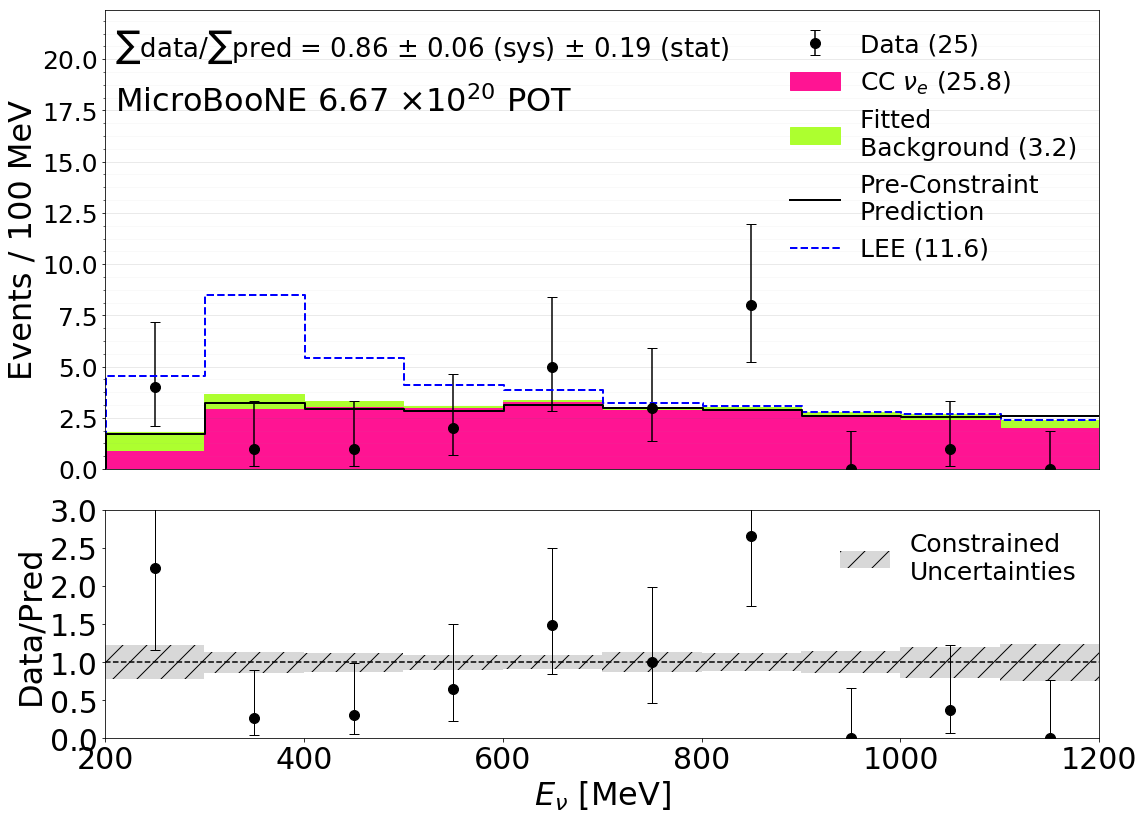

<Figure size 432x288 with 0 Axes>

In [23]:
fig,ax = plt.subplots(figsize=(16,11))
plt.subplot2grid((100,100),(0,0),colspan=100,rowspan=60)

plt.fill_between(xbins,np.zeros_like(xbins),nuep+numup,step='post',color='greenyellow',label='Fitted'+'\n'+r'Background (%2.1f)'%sum(np.array(numu)[mask]))
plt.fill_between(xbins,np.zeros_like(xbins),nuep,step='post',color='deeppink',label=r'CC $\nu_e$ (%2.1f)'%sum(np.array(nue)[mask]))
plt.plot(xbinsline,leep,lw=2,color='blue',ls='--',label='LEE (%2.1f)'%sum(np.array(LEE)[mask]))
#plt.fill_between(xbins,np.zeros_like(xbins),nuep+numup,step='post',color='limegreen',label=r'NC and CC $\nu_\mu$ (%2.1f)'%sum(numu)+'\n'+'(%2.1f >%i MeV)'%(sum(np.array(numu)[mask]),lowm))
#plt.fill_between(xbins,np.zeros_like(xbins),nuep,step='post',color='deeppink',label=r'CC $\nu_e$ (%2.1f)'%sum(nue)+'\n'+'(%2.1f > %2.0f MeV)'%(sum(np.array(nue)[mask]),lowm))
#plt.plot(xbinsline,leep,lw=2,color='blue',ls='--',label='Unfolded MB Excess (%2.1f)\n(%2.1f > %i MeV)'%(sum(LEE),sum(np.array(LEE)[mask]),lowm))

    
plt.plot(xbinsline,prep,lw=2,color='black',ls='-',label='Pre-Constraint\nPrediction')
#plt.errorbar(xbincenters,[e+m for e,m in zip(nue,numu)],yerr=syserr[0:-1],color='dimgrey',label='Constrained Uncertainties',lw=3,fmt='.',capsize=5)

plt.errorbar(xbincenters[mask],vals[mask],yerr=poisson_errors(vals[mask]),marker='o',ls='None',color='black',ms=10,label='Data (%i)'%sum(vals[mask]),elinewidth=1.5,capsize=5)

major_xticks = np.arange(200, 1200*1.01, 20)
minor_xticks = np.arange(200, 1200*1.01, 5)
major_yticks = np.arange(0, yhigh+1, 50)
minor_yticks = np.arange(0, yhigh+1, 10)

handles, labels = plt.gca().get_legend_handles_labels()
order = [4,3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='upper right',fontsize=25,ncol=1,frameon=False)

plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.17)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.07)
plt.yticks(fontsize=25)
plt.xticks([])

plt.ylim((0,yhigh))
plt.xlim((200,1200))

plt.ylabel("Events / 100 MeV",fontsize=32)
#plt.title(r'Final $1e1p$ Prediction Post-Constraint',fontsize=20)
#plt.text(700,0.92*yhigh,r'$\chi^2$/NDF ($p_{\rm ana}$): %2.2f/%i (%2.2f)'%(chi2,len(Del),pval),fontsize=17)
#plt.text(700,0.92*yhigh,r'$\chi^2$/NDF ($p_{\rm val}$): %2.2f/%i (0.01)'%(chi2,len(Del)),fontsize=17)

plt.text(210,0.9*yhigh,r'$\sum$data/$\sum$pred = %.2f $\pm$ %.2f (sys) $\pm$ %.2f (stat)'%(vals[mask].sum()/float(pred.sum()),
                                                                                           np.sqrt(fNorm_squared),
                                                                                           np.sqrt(pred.sum())/float(pred.sum())),
                                                                                           fontsize=26)#,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
plt.annotate(r'MicroBooNE %2.2f $\times 10^{20}$ POT'%(FullPOT/10**20),xy=(0.01,0.78),xycoords='axes fraction',fontsize=32)
            
plt.subplot2grid((100,100),(65,0),colspan=100,rowspan=30)

rat    = vals[mask]/pred
raterr = ([valerrs[0][i]/pred[i] if pred[i] > 0 else sqrt(2) for i in range(10)],[valerrs[1][i]/pred[i] if pred[i] > 0 else sqrt(2) for i in range(10)])

plt.errorbar(xbincenters[mask],rat,yerr=raterr,marker='o',ls='None',color='black',ms=10,elinewidth=1,capsize=5)
#plt.errorbar(xbincenters[mask],np.ones(10),yerr=np.array([sqrt(fraccov[j][j]) for j in range(10)]),color='dimgrey',lw=3,fmt='.',capsize=5)
plt.fill_between(xbins[2:],1-np.array([sqrt(fraccov[j][j]) for j in range(10)]+[0]),
                           1+np.array([sqrt(fraccov[j][j]) for j in range(10)]+[0]),
                           step='post',label='Constrained\nUncertainties',facecolor='grey',hatch='/',alpha=0.3)        

plt.legend(loc='upper right',frameon=False,fontsize=25,ncol=1)
plt.axhline(y=1.0,ls='--',color='black')
plt.xlabel(r'$E_\nu$ [MeV]',fontsize=32)
plt.ylabel("Data/Pred",fontsize=32)
plt.ylim((0,3))#1.1*max(rat)))
plt.xlim((200,1200))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks,minor=True)
plt.tight_layout()

plt.savefig('Plots/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionPlots/FinalSelection/BoxOpening/FinalConstrainedPlotWithRatio.png',dpi=100,bbox_inches='tight')
plt.show()
plt.clf()

# Constrained Plot With Ratio: Signal Only

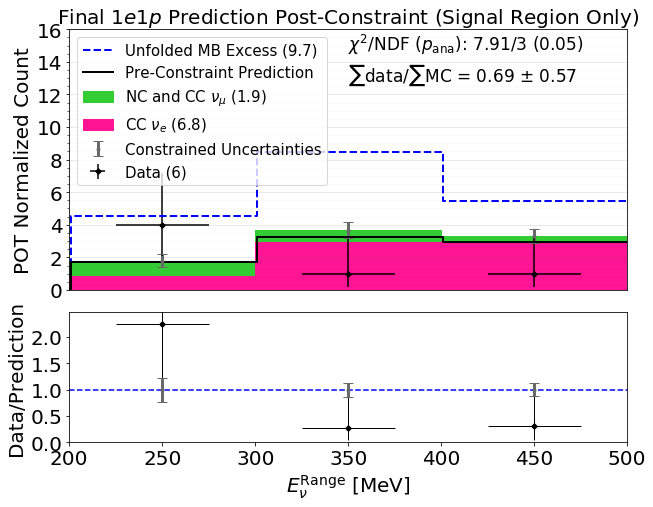

<Figure size 432x288 with 0 Axes>

In [16]:
lowm = 200
highm = 500
mask = np.logical_and(xbincenters>lowm,xbincenters<highm)
valerrs = poisson_errors(vals[mask])

mask1D = np.logical_and(np.arange(250,1200,100)>lowm,np.arange(250,1200,100)<highm)
mask2D = np.outer(mask1D,mask1D)

pred = np.array(nue)[mask] + np.array(numu)[mask]

cov = np.loadtxt('frac_covar_constr_coll.txt')[mask2D].reshape(len(pred),len(pred)) * np.outer(pred,pred)
for j in range(len(pred)):
    cov[j][j] += cov_cnp(vals[mask][j],pred[j])


Del = (vals[mask] - pred)


chi2 = np.matmul(np.matmul(Del,np.linalg.inv(cov)),Del)
pval = 1 - stats.chi2.cdf(chi2,len(Del))


yhigh = 4*max([max(pred),max(vals[mask])])
fig,ax = plt.subplots(figsize=(10,8))
plt.subplot2grid((100,100),(0,0),colspan=100,rowspan=60)

plt.fill_between(xbins,np.zeros_like(xbins),nuep+numup,step='post',color='limegreen',label=r'NC and CC $\nu_\mu$ (%2.1f)'%sum(np.array(numu)[mask]))
plt.fill_between(xbins,np.zeros_like(xbins),nuep,step='post',color='deeppink',label=r'CC $\nu_e$ (%2.1f)'%sum(np.array(nue)[mask]))
plt.plot(xbinsline,leep,lw=2,color='blue',ls='--',label='Unfolded MB Excess (%2.1f)'%sum(np.array(LEE)[mask]))
#plt.fill_between(xbins,np.zeros_like(xbins),nuep+numup,step='post',color='limegreen',label=r'NC and CC $\nu_\mu$ (%2.1f)'%sum(numu)+'\n'+'(%2.1f >%i MeV)'%(sum(np.array(numu)[mask]),lowm))
#plt.fill_between(xbins,np.zeros_like(xbins),nuep,step='post',color='deeppink',label=r'CC $\nu_e$ (%2.1f)'%sum(nue)+'\n'+'(%2.1f > %2.0f MeV)'%(sum(np.array(nue)[mask]),lowm))
#plt.plot(xbinsline,leep,lw=2,color='blue',ls='--',label='Unfolded MB Excess (%2.1f)\n(%2.1f > %i MeV)'%(sum(LEE),sum(np.array(LEE)[mask]),lowm))

    
plt.plot(xbinsline,prep,lw=2,color='black',ls='-',label='Pre-Constraint Prediction')
plt.errorbar(xbincenters,[e+m for e,m in zip(nue,numu)],yerr=syserr[0:-1],color='dimgrey',label='Constrained Uncertainties',lw=3,fmt='.',capsize=5)

plt.errorbar(xbincenters[mask],vals[mask],xerr=xbinwidts[mask]/2,yerr=poisson_errors(vals[mask]),marker='D',ls='None',color='black',ms=4,label='Data (%i)'%sum(vals[mask]),elinewidth=1.5)

major_xticks = np.arange(200, 1200*1.01, 20)
minor_xticks = np.arange(200, 1200*1.01, 5)
major_yticks = np.arange(0, yhigh+1, 50)
minor_yticks = np.arange(0, yhigh+1, 10)

plt.legend(loc='upper left',fontsize=15,ncol=1)
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.17)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.07)
plt.yticks(fontsize=20)
plt.xticks([])

plt.ylim((0,yhigh))
plt.xlim((lowm,highm))

plt.ylabel("POT Normalized Count",fontsize=20)
plt.title(r'Final $1e1p$ Prediction Post-Constraint (Signal Region Only)',fontsize=20)
plt.text(350,0.92*yhigh,r'$\chi^2$/NDF ($p_{\rm ana}$): %2.2f/%i (%2.2f)'%(chi2,len(Del),pval),fontsize=17)

plt.text(350,0.8*yhigh,r'$\sum$data/$\sum$MC = %.2f $\pm$ %.2f'%(vals[mask].sum()/float(pred.sum()),np.sqrt(vals.sum())/float(pred.sum())),fontsize=17)

plt.subplot2grid((100,100),(65,0),colspan=100,rowspan=30)

rat    = vals[mask]/pred
raterr = ([valerrs[0][i]/pred[i] if pred[i] > 0 else sqrt(2) for i in range(3)],[valerrs[1][i]/pred[i] if pred[i] > 0 else sqrt(2) for i in range(3)])

plt.errorbar(xbincenters[mask],rat,yerr=raterr,xerr=xbinwidts[mask]/2.0,marker='D',ls='None',color='black',ms=4,elinewidth=1)
fraccov = np.loadtxt('frac_covar_constr_coll.txt')[mask2D].reshape(len(pred),len(pred))
plt.errorbar(xbincenters[mask],np.ones(3),yerr=np.array([sqrt(fraccov[j][j]) for j in range(3)]),color='dimgrey',lw=3,fmt='.',capsize=5)

plt.axhline(y=1.0,ls='--',color='blue')
plt.xlabel(r'$E_\nu^{\rm Range}$ [MeV]',fontsize=20)
plt.ylabel("Data/Prediction",fontsize=20)
plt.ylim((0,1.1*max(rat)))
plt.xlim((lowm,highm))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xticks(major_xticks)
ax.set_xticks(minor_xticks,minor=True)
#plt.tight_layout()

plt.savefig('Plots/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionPlots/FinalSelection/BoxOpening/FinalConstrainedPlotWithRatioSignalOnly.png',dpi=100)
plt.show()
plt.clf()


In [1]:
dirtt = pd.read_parquet('Parquets/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/SelectionMode0_dirt_fset12_run3.parquet.gzip')

NameError: name 'pd' is not defined

In [2]:
MakeAvgBDTcut(dirtt,0.95,nBDTs,False,ttc=0.1)
print(dirtt.query('sigprobavg>0.01'))
print(dirtt.query('BDTscore_1e1p>0.1')['BDTscore_1e1p'])

NameError: name 'MakeAvgBDTcut' is not defined